# Importing all Libraries

In [5]:
import optuna
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import model_selection
from optuna.visualization.matplotlib import plot_param_importances
from sklearn.model_selection import train_test_split
import sklearn.svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Gathering Data

In [2]:
#Grabbing X and Y:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
X_train=train.drop(labels="phishing",axis=1)
X_test=test.drop(labels="phishing",axis=1)
y_train=train[["phishing"]]
y_test=test[["phishing"]]



# Logistic Regression Algorithm 

In [41]:
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = 'LogReg'
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])
        if penalty == 'l1':
            solver = 'saga'
        else:
            solver = 'lbfgs'
        C = trial.suggest_uniform('C', 0.01, 10)
        classifier_obj = linear_model.LogisticRegression(penalty=penalty, C=C, solver=solver)

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2022-08-06 17:15:55,810] A new study created in memory with name: no-name-ae9a75dc-17c9-4e87-8b1a-65b597e6bbd7
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if array.ndim == 0:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if array.ndim == 0:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if array.ndim == 0:
[I 2022-08-06 17:15:56,749] Trial 0 finished with value: 0.9249653263976564 and parameters: {'penalty': 'l2', 'C': 4.7948551194

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if array.ndim == 0:
[I 2022-08-06 17:16:10,354] Trial 8 finished with value: 0.9249653263976564 and parameters: {'penalty': 'l2', 'C': 3.5830519191798604}. Best is trial 1 with value: 0.9249782053611574.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if array.ndim == 0:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if array.ndim == 0:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\v

## Important hyperparameters

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  """Entry point for launching an IPython kernel.


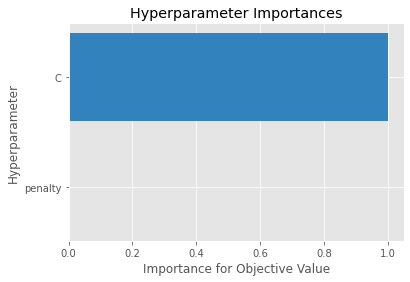

In [42]:
plot_param_importances(study);

## Getting best parameter

In [43]:
trial = study.best_trial
trial.params

{'penalty': 'l2', 'C': 6.48103591732811}

## Training model with best parameters

In [44]:
lr=linear_model.LogisticRegression(penalty=trial.params['penalty'],C=trial.params['C'])
lr.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if array.ndim == 0:


LogisticRegression(C=6.48103591732811, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Performance matrix 

In [45]:
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17333  1845]
 [ 1022 18156]]
0.925252893940974
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     19178
         1.0       0.91      0.95      0.93     19178

    accuracy                           0.93     38356
   macro avg       0.93      0.93      0.93     38356
weighted avg       0.93      0.93      0.93     38356



# Random forest Algorithm

In [46]:
def objective(trial):

    classifier_name = 'RandomForest'
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))
        criterion = trial.suggest_categorical('criterion', ['entropy','gini'])
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators,criterion=criterion, max_depth=max_depth,min_samples_split=min_samples_split
            ,min_samples_leaf=min_samples_leaf)

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2022-08-06 17:17:45,990] A new study created in memory with name: no-name-5f1859bb-cf3d-477f-94ac-c4c761f025a8
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[I 2022-08-06 17:25

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[I 2022-08-06 17:55:45,254] Trial 7 finished with value: 0.9565324979631845 and parameters: {'n_estimators': 1340, 'max_depth': 13.027734454090218, 'criterion': 'gini', 'min_samples_split': 5, 'min_samples_leaf': 20}. Best is trial 4 with value: 0.9659343776895336.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array wa

## Important hyperparameters

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  """Entry point for launching an IPython kernel.


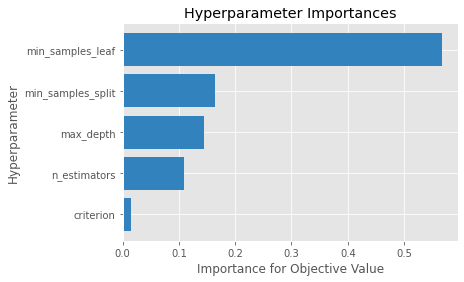

In [47]:
plot_param_importances(study);

## Getting best parameter

In [48]:
trial = study.best_trial
trial.params

{'n_estimators': 960,
 'max_depth': 36.49687323517067,
 'criterion': 'gini',
 'min_samples_split': 6,
 'min_samples_leaf': 4}

## Training model with best parameters

In [49]:
rf=sklearn.ensemble.RandomForestClassifier(
            n_estimators=trial.params['n_estimators'],criterion=trial.params['criterion'], 
            max_depth=trial.params['max_depth'],min_samples_split=trial.params['min_samples_split']
            ,min_samples_leaf=trial.params['min_samples_leaf'])
rf.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=36.49687323517067,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=6, min_weight_fraction_leaf=0.0,
                       n_estimators=960, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

## Performance matrix 

In [50]:
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18028  1150]
 [  542 18636]]
0.9558869538012306
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     19178
         1.0       0.94      0.97      0.96     19178

    accuracy                           0.96     38356
   macro avg       0.96      0.96      0.96     38356
weighted avg       0.96      0.96      0.96     38356



# SVC Algorithm

In [3]:
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = 'SVC'
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'SVC':
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        C = trial.suggest_uniform('C', 0.01, 10)
        degree = trial.suggest_discrete_uniform('degree', 1, 5, 1)
        classifier_obj = sklearn.svm.SVC(kernel=kernel,C=C,degree=degree )

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2022-08-06 19:40:02,606] A new study created in memory with name: no-name-1d9f074d-1e10-4c66-b4ed-9ec226b72663
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2022-08-06 19:44:13,280] Trial 0 finished with value: 0.8783809275899767 and parameters: {'

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2022-08-06 20:18:20,519] Trial 8 finished with value: 0.9267684255761862 and parameters: {'kernel': 'linear', 'C': 2.154251730084561, 'degree': 3.0}. Best is trial 4 with value: 0.9410258208433836.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\User

## Important hyperparameters

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  """Entry point for launching an IPython kernel.


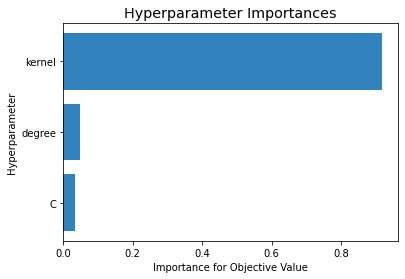

In [4]:
plot_param_importances(study);

## Getting best parameter

In [5]:
trial = study.best_trial
trial.params

{'kernel': 'poly', 'C': 7.871024596290017, 'degree': 3.0}

## Training model with best parameters

In [6]:
svc=sklearn.svm.SVC(kernel=trial.params['kernel'],C=trial.params['C'],degree=trial.params['degree'] )
svc.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=7.871024596290017, degree=3.0, kernel='poly')

## Performance matrix 

In [7]:
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17602  1576]
 [  775 18403]]
0.9387058087391803
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     19178
         1.0       0.92      0.96      0.94     19178

    accuracy                           0.94     38356
   macro avg       0.94      0.94      0.94     38356
weighted avg       0.94      0.94      0.94     38356



# Naive Bayes 

In [8]:
def objective(trial):

    classifier_name = 'NaiveBayes'
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'NaiveBayes':
        var_smoothing=trial.suggest_float("var_smoothing", 1e-4, 0.3, log=True)
        classifier_obj = sklearn.naive_bayes.GaussianNB(var_smoothing=var_smoothing)

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2022-08-06 20:26:32,496] A new study created in memory with name: no-name-084454d2-85ac-46c2-9e76-32e8bbb640b0
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2022-08-06 20:26:32,714] Trial 0 finished with value: 0.9178044335946057 and parameters: {'

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2022-08-06 20:26:34,427] Trial 8 finished with value: 0.9179074692835923 and parameters: {'var_smoothing': 0.007438237350567489}. Best is trial 5 with value: 0.9203287801079312.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib

## Important hyperparameters

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  """Entry point for launching an IPython kernel.


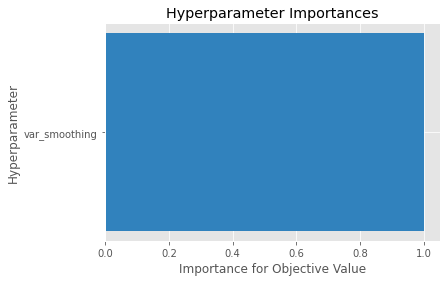

In [9]:
plot_param_importances(study);

## Getting best parameter

In [10]:
trial = study.best_trial
trial.params

{'var_smoothing': 0.23126489489556085}

## Training model with best parameters

In [11]:
nb=sklearn.naive_bayes.GaussianNB(var_smoothing=trial.params['var_smoothing'])
nb.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(var_smoothing=0.23126489489556085)

## Performance matrix 

In [12]:
y_pred=nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16545  2633]
 [  395 18783]]
0.9210553759516112
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     19178
         1.0       0.88      0.98      0.93     19178

    accuracy                           0.92     38356
   macro avg       0.93      0.92      0.92     38356
weighted avg       0.93      0.92      0.92     38356



# Descision Tree

In [13]:
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = 'decision-tree'
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'decision-tree':
        criterion = trial.suggest_categorical('criterion', ['entropy','gini'])
        max_depth = trial.suggest_int('max_depth', 5, X_train.shape[1])
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
        classifier_obj = sklearn.tree.DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,
                                                            min_samples_leaf=min_samples_leaf)

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2022-08-06 20:26:35,506] A new study created in memory with name: no-name-77604ed0-e7d2-4dab-a4bd-6cf005678a3a
[I 2022-08-06 20:26:36,349] Trial 0 finished with value: 0.9515868376397864 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9515868376397864.
[I 2022-08-06 20:26:37,538] Trial 1 finished with value: 0.9546263571242001 and parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 15}. Best is trial 1 with value: 0.9546263571242001.
[I 2022-08-06 20:26:38,415] Trial 2 finished with value: 0.9502087542092367 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.9546263571242001.
[I 2022-08-06 20:26:39,102] Trial 3 finished with value: 0.9432796892182945 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 19}. Best is trial 1 with

## Important hyperparameters

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  """Entry point for launching an IPython kernel.


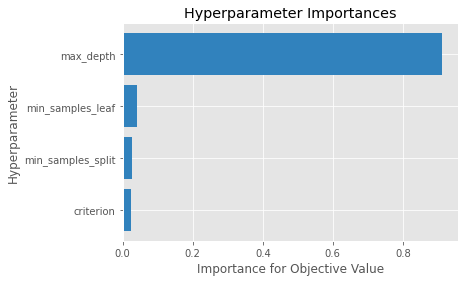

In [14]:
plot_param_importances(study);

## Getting best parameter

In [15]:
trial = study.best_trial
trial.params

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_split': 19,
 'min_samples_leaf': 15}

## Training model with best parameters

In [16]:
dt=sklearn.tree.DecisionTreeClassifier(criterion=trial.params['criterion'],
                                       max_depth=trial.params['max_depth'],
                                        min_samples_split=trial.params['min_samples_split'],
                                        min_samples_leaf=trial.params['min_samples_leaf'])
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=15,
                       min_samples_split=19)

## Performance matrix 

In [17]:
y_pred=dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17772  1406]
 [  718 18460]]
0.9446240483887788
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94     19178
         1.0       0.93      0.96      0.95     19178

    accuracy                           0.94     38356
   macro avg       0.95      0.94      0.94     38356
weighted avg       0.95      0.94      0.94     38356



# XGboost 

In [18]:
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = 'xgb'
    
    # Step 2. Setup values for the hyperparameters:
    param  = {
        'verbosity' : 3,
        'booster' : trial.suggest_categorical('booster' , ['dart' , 'gbtree','gblinear']),
        'lambda' : trial.suggest_float('lambda' , 1e-4 , 1),
        'alpha' :trial.suggest_float('alpha' , 1e-4 , 1),
        'subsample' : trial.suggest_float('subsample' , .1,.5),
        'colsample_bytree' : trial.suggest_float('colsample_bytree' , .1 ,.5)
        
    }
   
    if param['booster'] in ['gbtree' , 'dart']:
        param['gamma'] :trial.suggest_float('gamma' , 1e-3 , 4 )
        param['eta'] : trial.suggest_float('eta' , .001 ,5 )
    classifier_obj = xgb.XGBClassifier(**param)        
    # Step 3: Scoring method:
    classifier_obj.fit(X_train, y_train)
    accuracy  = classifier_obj.score(X_train, y_train)
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2022-08-06 20:26:46,189] A new study created in memory with name: no-name-ba10ffd9-6ab7-4dbf-ab02-d71c4e90ba23


[20:26:46] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[20:26:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[20:26:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:26:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[20:26:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:26:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[20:26:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 tree

[20:26:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[20:26:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:26:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[20:26:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:26:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[20:26:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:26:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101:

[20:26:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[20:26:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:26:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[20:26:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:26:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[20:26:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:26:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: 

[20:27:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[20:27:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[20:27:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[20:27:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101:

[I 2022-08-06 20:27:20,848] Trial 0 finished with value: 0.9700942764411932 and parameters: {'booster': 'dart', 'lambda': 0.2314536488069119, 'alpha': 0.5356969828171508, 'subsample': 0.2233809975885803, 'colsample_bytree': 0.21425725162163123}. Best is trial 0 with value: 0.9700942764411932.


[20:27:20] ======== Monitor (0): Learner ========
[20:27:20] Configure: 0.001417s, 1 calls @ 1417us

[20:27:20] ======== Monitor (0): GBTree ========
[20:27:20] ======== Monitor (0): TreePruner ========
[20:27:20] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[20:27:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[20:27:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[20:27:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src

[20:27:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[20:27:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[20:27:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[20:27:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: 

[20:27:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[20:27:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:27:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:27:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tr

[20:27:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[20:27:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[20:27:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[20:27:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:27:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tr

[I 2022-08-06 20:27:52,141] Trial 1 finished with value: 0.9577559115965174 and parameters: {'booster': 'dart', 'lambda': 0.1926923393617142, 'alpha': 0.25278272699311505, 'subsample': 0.18336763130737255, 'colsample_bytree': 0.1573381774810405}. Best is trial 0 with value: 0.9700942764411932.


[20:27:52] ======== Monitor (0): Learner ========
[20:27:52] Configure: 0.001365s, 1 calls @ 1365us

[20:27:52] ======== Monitor (0): GBTree ========
[20:27:52] ======== Monitor (0): TreePruner ========
[20:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-08-06 20:27:53,629] Trial 2 finished with value: 0.8943511411055587 and parameters: {'booster': 'gblinear', 'lambda': 0.9065290861020008, 'alpha': 0.20600380386343028, 'subsample': 0.13746158450789203, 'colsample_bytree': 0.2563264353664062}. Best is trial 0 with value: 0.9700942764411932.


[20:27:53] ======== Monitor (0): Learner ========
[20:27:53] Configure: 0.001342s, 1 calls @ 1342us

[20:27:53] EvalOneIter: 0.001057s, 100 calls @ 1057us

[20:27:53] GetGradient: 0.160626s, 100 calls @ 160626us

[20:27:53] PredictRaw: 0.223103s, 100 calls @ 223103us

[20:27:53] UpdateOneIter: 1.16949s, 100 calls @ 1169489us

[20:27:53] ======== Monitor (0): GBLinear ========
[20:27:53] DoBoost: 0.78351s, 100 calls @ 783510us

[20:27:53] PredictBatch: 0.222757s, 100 calls @ 222757us

[20:27:53] PredictBatchInternal: 0.222433s, 100 calls @ 222433us

[20:27:53] ======== Monitor (0): Learner ========
[20:27:53] Configure: 0.000567s, 1 calls @ 567us

[20:27:53] ======== Monitor (0): GBLinear ========
[20:27:53] PredictBatch: 0.001739s, 1 calls @ 1739us

[20:27:53] PredictBatchInternal: 0.001735s, 1 calls @ 1735us

[20:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This c

[I 2022-08-06 20:27:54,756] Trial 3 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 0.04105839690981179, 'alpha': 0.5026293518659649, 'subsample': 0.37248783887211845, 'colsample_bytree': 0.2906849746775614}. Best is trial 0 with value: 0.9700942764411932.


[20:27:54] ======== Monitor (0): Learner ========
[20:27:54] Configure: 0.002169s, 1 calls @ 2169us

[20:27:54] EvalOneIter: 0.000996s, 100 calls @ 996us

[20:27:54] GetGradient: 0.143455s, 100 calls @ 143455us

[20:27:54] PredictRaw: 0.209299s, 100 calls @ 209299us

[20:27:54] UpdateOneIter: 0.843767s, 100 calls @ 843767us

[20:27:54] ======== Monitor (0): GBLinear ========
[20:27:54] DoBoost: 0.488035s, 100 calls @ 488035us

[20:27:54] PredictBatch: 0.209006s, 100 calls @ 209006us

[20:27:54] PredictBatchInternal: 0.208714s, 100 calls @ 208714us

[20:27:54] ======== Monitor (0): Learner ========
[20:27:54] Configure: 0.000624s, 1 calls @ 624us

[20:27:54] ======== Monitor (0): GBLinear ========
[20:27:54] PredictBatch: 0.001709s, 1 calls @ 1709us

[20:27:54] PredictBatchInternal: 0.001705s, 1 calls @ 1705us

[20:27:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This c

[I 2022-08-06 20:27:56,166] Trial 4 finished with value: 0.8943511411055587 and parameters: {'booster': 'gblinear', 'lambda': 0.2323083300081686, 'alpha': 0.16024462427685218, 'subsample': 0.27854365783642565, 'colsample_bytree': 0.1262551709842991}. Best is trial 0 with value: 0.9700942764411932.


[20:27:56] ======== Monitor (0): Learner ========
[20:27:56] Configure: 0.001325s, 1 calls @ 1325us

[20:27:56] EvalOneIter: 0.001043s, 100 calls @ 1043us

[20:27:56] GetGradient: 0.140858s, 100 calls @ 140858us

[20:27:56] PredictRaw: 0.192169s, 100 calls @ 192169us

[20:27:56] UpdateOneIter: 1.09401s, 100 calls @ 1094008us

[20:27:56] ======== Monitor (0): GBLinear ========
[20:27:56] DoBoost: 0.758803s, 100 calls @ 758803us

[20:27:56] PredictBatch: 0.191849s, 100 calls @ 191849us

[20:27:56] PredictBatchInternal: 0.191558s, 100 calls @ 191558us

[20:27:56] ======== Monitor (0): Learner ========
[20:27:56] Configure: 0.000627s, 1 calls @ 627us

[20:27:56] ======== Monitor (0): GBLinear ========
[20:27:56] PredictBatch: 0.001737s, 1 calls @ 1737us

[20:27:56] PredictBatchInternal: 0.001734s, 1 calls @ 1734us

[20:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This 

[I 2022-08-06 20:27:57,262] Trial 5 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 0.8318107448011184, 'alpha': 0.9595425780392538, 'subsample': 0.41895680879019437, 'colsample_bytree': 0.3072459610199601}. Best is trial 0 with value: 0.9700942764411932.


[20:27:57] ======== Monitor (0): Learner ========
[20:27:57] Configure: 0.002176s, 1 calls @ 2176us

[20:27:57] EvalOneIter: 0.001024s, 100 calls @ 1024us

[20:27:57] GetGradient: 0.141773s, 100 calls @ 141773us

[20:27:57] PredictRaw: 0.197893s, 100 calls @ 197893us

[20:27:57] UpdateOneIter: 0.810678s, 100 calls @ 810678us

[20:27:57] ======== Monitor (0): GBLinear ========
[20:27:57] DoBoost: 0.467965s, 100 calls @ 467965us

[20:27:57] PredictBatch: 0.19758s, 100 calls @ 197580us

[20:27:57] PredictBatchInternal: 0.197299s, 100 calls @ 197299us

[20:27:57] ======== Monitor (0): Learner ========
[20:27:57] Configure: 0.000619s, 1 calls @ 619us

[20:27:57] ======== Monitor (0): GBLinear ========
[20:27:57] PredictBatch: 0.001757s, 1 calls @ 1757us

[20:27:57] PredictBatchInternal: 0.001754s, 1 calls @ 1754us

[20:27:57] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[20:27:57] INFO: C:/Users/Administrator/workspace/xgboo

[20:28:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[20:28:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[20:28:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[20:28:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[20:28:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[20:28:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 

[20:28:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[20:28:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[20:28:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[20:28:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[20:28:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[20:28:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 

[I 2022-08-06 20:28:04,508] Trial 6 finished with value: 0.9752717531296687 and parameters: {'booster': 'gbtree', 'lambda': 0.8726548556123835, 'alpha': 0.658659200164908, 'subsample': 0.2600165125235496, 'colsample_bytree': 0.4969552325949049}. Best is trial 6 with value: 0.9752717531296687.


[20:28:04] ======== Monitor (0): Learner ========
[20:28:04] Configure: 0.000942s, 1 calls @ 942us

[20:28:04] ======== Monitor (0): GBTree ========
[20:28:04] ======== Monitor (0): TreePruner ========
[20:28:04] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[20:28:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[20:28:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[20:28:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/sr

[20:28:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[20:28:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[20:28:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[20:28:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101

[20:28:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[20:28:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[20:28:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[20:28:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: 

[20:28:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[20:28:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[20:28:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[20:28:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:909: drop 0 trees, weight = 1
[20:28:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: 

[I 2022-08-06 20:28:39,116] Trial 7 finished with value: 0.973713358405028 and parameters: {'booster': 'dart', 'lambda': 0.8711880014953811, 'alpha': 0.4314530391833857, 'subsample': 0.31797707192489916, 'colsample_bytree': 0.3182869289746802}. Best is trial 6 with value: 0.9752717531296687.


[20:28:39] ======== Monitor (0): Learner ========
[20:28:39] Configure: 0.001356s, 1 calls @ 1356us

[20:28:39] ======== Monitor (0): GBTree ========
[20:28:39] ======== Monitor (0): TreePruner ========
[20:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-08-06 20:28:40,488] Trial 8 finished with value: 0.9124336716294884 and parameters: {'booster': 'gblinear', 'lambda': 0.1976375302749832, 'alpha': 0.06571043694772942, 'subsample': 0.26305888609911615, 'colsample_bytree': 0.4205583935440911}. Best is trial 6 with value: 0.9752717531296687.


[20:28:40] ======== Monitor (0): Learner ========
[20:28:40] Configure: 0.00166s, 1 calls @ 1660us

[20:28:40] EvalOneIter: 0.001018s, 100 calls @ 1018us

[20:28:40] GetGradient: 0.139672s, 100 calls @ 139672us

[20:28:40] PredictRaw: 0.198175s, 100 calls @ 198175us

[20:28:40] UpdateOneIter: 1.06865s, 100 calls @ 1068653us

[20:28:40] ======== Monitor (0): GBLinear ========
[20:28:40] DoBoost: 0.728291s, 100 calls @ 728291us

[20:28:40] PredictBatch: 0.197865s, 100 calls @ 197865us

[20:28:40] PredictBatchInternal: 0.197562s, 100 calls @ 197562us

[20:28:40] ======== Monitor (0): Learner ========
[20:28:40] Configure: 0.000619s, 1 calls @ 619us

[20:28:40] ======== Monitor (0): GBLinear ========
[20:28:40] PredictBatch: 0.001726s, 1 calls @ 1726us

[20:28:40] PredictBatchInternal: 0.001719s, 1 calls @ 1719us

[20:28:40] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[20:28:40] INFO: C:/Users/Administrator/workspace/xgboo

[20:28:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[20:28:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[20:28:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[20:28:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[20:28:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[20:28:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 

[I 2022-08-06 20:28:47,522] Trial 9 finished with value: 0.975928597187162 and parameters: {'booster': 'gbtree', 'lambda': 0.03698372506706345, 'alpha': 0.3565967456483075, 'subsample': 0.22066640010407823, 'colsample_bytree': 0.48930969405740266}. Best is trial 9 with value: 0.975928597187162.


[20:28:47] ======== Monitor (0): Learner ========
[20:28:47] Configure: 0.001313s, 1 calls @ 1313us

[20:28:47] ======== Monitor (0): GBTree ========
[20:28:47] ======== Monitor (0): TreePruner ========


## Important hyperparameters

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  """Entry point for launching an IPython kernel.


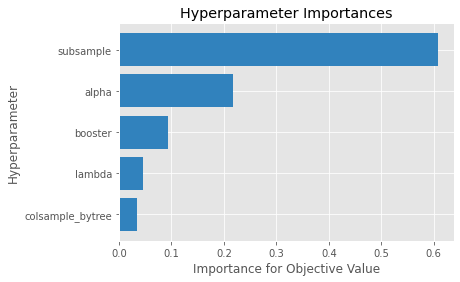

In [19]:
plot_param_importances(study);

## Getting best parameter

In [20]:
trial = study.best_trial
param=trial.params
param

{'booster': 'gbtree',
 'lambda': 0.03698372506706345,
 'alpha': 0.3565967456483075,
 'subsample': 0.22066640010407823,
 'colsample_bytree': 0.48930969405740266}

## Training model with best parameters

In [21]:
xgb_obj = xgb.XGBClassifier(**param)
xgb_obj.fit(X_train, y_train)

[20:28:48] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[20:28:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[20:28:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[20:28:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[20:28:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[20:28:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 112 extra nodes, 0 pruned nodes, max_depth=6
[20:28:48] INFO: C:/U

[20:28:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[20:28:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[20:28:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[20:28:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[20:28:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[20:28:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 

[20:28:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[20:28:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[20:28:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[20:28:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[20:28:55] ======== Monitor (0): Learner ========
[20:28:55] Configure: 0.001425s, 1 calls @ 1425us

[20:28:55] EvalOneIter: 0.001008s, 100 calls @ 1008us

[20:28:55] GetGradient: 0.137612s, 100 calls @ 137612us

[20:28:55] PredictRaw: 0.523051s, 100 calls @ 523051us

[20:28:55] UpdateOneIter: 6.45117s, 100 calls @

XGBClassifier(alpha=0.3565967456483075, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.48930969405740266, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', lambda=0.03698372506706345,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

## Performance matrix 

In [22]:
y_pred=xgb_obj.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17794  1384]
 [  707 18471]]
0.9454844092188966
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94     19178
         1.0       0.93      0.96      0.95     19178

    accuracy                           0.95     38356
   macro avg       0.95      0.95      0.95     38356
weighted avg       0.95      0.95      0.95     38356



## Observations
### From the above experiments we can select some hyperparameters for each algos
### 1.Logistic Regression: C
### 2.Random Forest: min_samples_split,min_samples_leaf
### 3.SVC: kernel
### 4.Naive Bayes: var_smoothing
### 5.Descision Tree: max_depth
### 6.XGBoost: subsample,alpha

# Creating a function to select the best model after hyperparameter tuning giving best accuracy and best auc_roc_score

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
X_train=train.drop(labels="phishing",axis=1)
X_test=test.drop(labels="phishing",axis=1)
y_train=train[["phishing"]]
y_test=test[["phishing"]]

def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest","SVC","NaiveBayes",
                                                               "decision-tree","xgb"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        C = trial.suggest_uniform('C', 0.01, 10)
        classifier_obj = linear_model.LogisticRegression(C=C)
    
    elif classifier_name == 'RandomForest':
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(min_samples_split=min_samples_split,
                                                                 min_samples_leaf=min_samples_leaf)
    
    elif classifier_name == 'SVC':
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        classifier_obj = sklearn.svm.SVC(kernel=kernel)
        
    elif classifier_name == 'NaiveBayes':
        var_smoothing=trial.suggest_float("var_smoothing", 1e-4, 0.3, log=True)
        classifier_obj = sklearn.naive_bayes.GaussianNB(var_smoothing=var_smoothing)
    elif classifier_name == 'decision-tree':
        max_depth = trial.suggest_int('max_depth', 5, X_train.shape[1])
        classifier_obj = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
    
    elif classifier_name == 'xgb':
        alpha =trial.suggest_float('alpha' , 1e-4 , 1)
        subsample =trial.suggest_float('subsample' , .1,.5)
        classifier_obj = xgb.XGBClassifier(alpha=alpha,subsample=subsample)

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, cv=3)
    roc_auc_score = model_selection.cross_val_score(classifier_obj, X_train, y_train, scoring="roc_auc")
    accuracy = score.mean()
    roc_auc = roc_auc_score.mean()
    return accuracy,roc_auc

# Step 4: Running it
sampler = optuna.samplers.NSGAIISampler()
study = optuna.create_study(directions=["maximize", "maximize"], sampler=sampler)
study.optimize(objective, n_trials=10)

[I 2022-08-08 12:59:18,236] A new study created in memory with name: no-name-2709f8e5-c16f-44ae-add2-28bf7bc844bb
[I 2022-08-08 12:59:21,556] Trial 0 finished with values: [0.9518186619685386, 0.9837935688186763] and parameters: {'classifier': 'decision-tree', 'max_depth': 8}. 
[I 2022-08-08 13:00:32,250] Trial 1 finished with values: [0.9652904155810575, 0.9941830641701124] and parameters: {'classifier': 'xgb', 'alpha': 0.1765170046214821, 'subsample': 0.2442955003517441}. 
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [30]:
trial = study.best_trials
trial[0]
print('Accuracy and Auc roc score: {}'.format(trial[0].values))
print("Best hyperparameters: {}".format(trial[0].params))

Accuracy and Auc roc score: [0.9652904155810575, 0.9941830641701124]
Best hyperparameters: {'classifier': 'xgb', 'alpha': 0.1765170046214821, 'subsample': 0.2442955003517441}


In [24]:
trial = study.best_trials
param=trial[0].params
param

{'classifier': 'xgb',
 'alpha': 0.1765170046214821,
 'subsample': 0.2442955003517441}

In [25]:
xgb_obj = xgb.XGBClassifier(**param)
xgb_obj.fit(X_train, y_train)

[13:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "classifier" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(alpha=0.1765170046214821, base_score=0.5, booster='gbtree',
              callbacks=None, classifier='xgb', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [26]:
y_pred=xgb_obj.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[17897  1281]
 [  629 18549]]
0.9502033580143915
0.9502033580143914
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     19178
         1.0       0.94      0.97      0.95     19178

    accuracy                           0.95     38356
   macro avg       0.95      0.95      0.95     38356
weighted avg       0.95      0.95      0.95     38356

